In [7]:
!pipenv install pandas seaborn scikit-learn matplotlib scipy ipywidgets ipykernel optuna streamlit

Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.
Installing pandas...
Resolving pandas...
Added pandas to Pipfile's [packages] ...
✔ Installation Succeeded...
⠋ Installing pandas...
Installing seaborn...
Resolving seaborn...
Added seaborn to Pipfile's [packages] ...
✔ Installation Succeededn...
⠋ Installing seaborn...
Installing scikit-learn...
Resolving scikit-learn...
Added scikit-learn to Pipfile's [packages] ...
✔ Installation Succeeded-learn...
⠋ Installing scikit-learn...
Installing matplotlib...
Resolving matplotlib...
Added matplotlib to Pipfile's [packages] ...
✔ Installation Succeededtlib...
⠋ Installing matplotlib...
Installing scipy...
Resolving scipy...
Added scipy to Pipfile's [packages] ..

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree 

import optuna

In [36]:
df = pd.read_csv('./datasets/laptops.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [38]:
df.isnull().sum()

index                       0
brand                       0
model                       0
price                       0
rating                      0
processor_brand             0
processor_tier              0
num_cores                   0
num_threads                 0
ram_memory                  0
primary_storage_type        0
primary_storage_capacity    0
gpu_brand                   0
gpu_type                    0
is_touch_screen             0
display_size                0
resolution_width            0
resolution_height           0
os                          0
year_of_warranty            0
dtype: int64

In [39]:
df.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,15.171241,2003.503532,1181.227043
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.938089,361.965292,263.884019
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,10.100000,1080.000000,768.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,18.000000,3840.000000,2560.000000


In [40]:
df.gpu_type.unique()

array(['integrated', 'dedicated', 'apple'], dtype=object)

In [41]:
df.gpu_brand.unique()

array(['intel', 'amd', 'apple', 'nvidia', 'arm'], dtype=object)

In [42]:
df.os.unique()

array(['windows', 'mac', 'dos', 'android', 'chrome', 'other', 'ubuntu'],
      dtype=object)

In [43]:
df.os.value_counts()

os
windows    924
dos         32
chrome      16
mac         15
other        2
android      1
ubuntu       1
Name: count, dtype: int64

In [44]:
df.head()

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1


In [45]:
df.tail()

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,791.44,68,amd,ryzen 5,6,12,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,1103.27,73,intel,core i7,10,16,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,539.58,59,amd,ryzen 5,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,815.43,68,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,False,14.0,2560,1600,windows,1
990,1002,hp,HP Chromebook 15a-na0008TU Laptop (Intel Celer...,251.74,37,intel,celeron,2,2,4,HDD,128,intel,integrated,False,15.6,1366,768,chrome,1


In [46]:
df[df.os == 'mac'].model.unique()

array(['Apple MacBook Air 2020 MGND3HN Laptop (Apple M1/ 8GB/ 256GB SSD/ MacOS)',
       'Apple MacBook Pro 16 2023 Laptop (Apple M3 Max/ 48GB/ 1TB SSD/ macOS)',
       'Apple MacBook Air 2022 Laptop (Apple M2/ 8GB/ 256GB SSD/ MacOS)',
       'Apple MacBook Air 15 2023 Laptop (Apple M2/ 8GB/ 256GB SSD/ MacOS)',
       'Apple MacBook Pro 2022 Laptop (Apple M2/ 8GB/ 256GB SSD/ macOS)',
       'Apple MacBook Pro 16 2023 Laptop (Apple M3 Pro/ 36GB/ 512GB SSD/ macOS)',
       'Apple MacBook Pro 16 2023 Laptop (Apple M3 Max/ 36GB/ 1TB SSD/ macOS)',
       'Apple MacBook Pro 16 2023 Laptop (Apple M3 Pro/ 18GB/ 512GB SSD/ macOS)',
       'Apple MacBook Pro 14 2023 Laptop (Apple M3 Pro/ 18GB/ 512GB SSD/ macOS)',
       'Apple MacBook Air 15 2023 Laptop (Apple M2/ 8GB/ 512GB SSD/ MacOS)',
       'Apple MacBook Air 2022 Laptop (Apple M2/ 8GB/ 512GB SSD/ MacOS)',
       'Apple MacBook Pro 2022 Laptop (Apple M2/ 8GB/ 512GB SSD/ macOS)',
       'Apple MacBook Pro 14 2023 Laptop (Apple M3/ 8GB/ 1TB S

In [47]:
df[df.os == 'other'].model

192    Jio JioBook NB1112MM BLU 2023 Netbook Laptop (...
372    Primebook PBMTWIFI11064 Wi-Fi Laptop (MediaTek...
Name: model, dtype: object

<Axes: xlabel='os', ylabel='Count'>

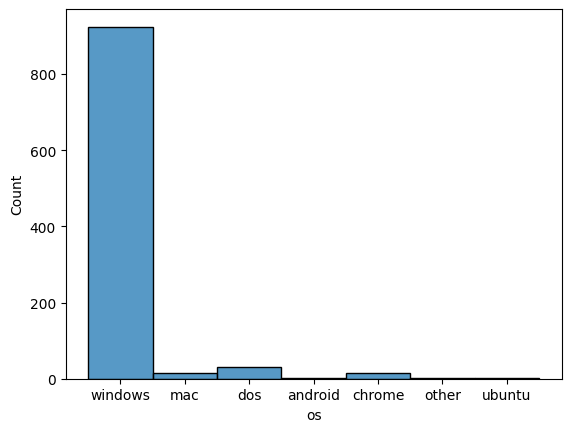

In [48]:
sns.histplot(data=df, x=df.os)

<Axes: xlabel='price', ylabel='Count'>

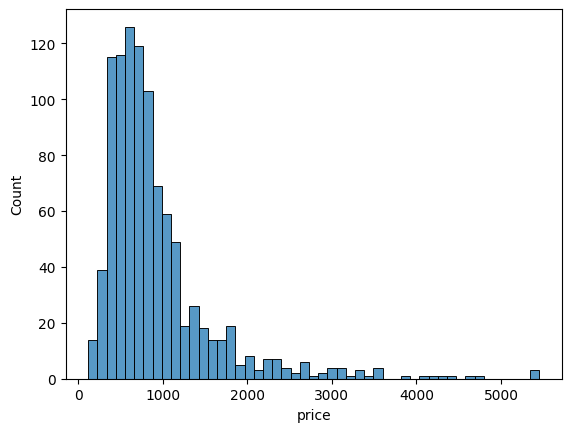

In [49]:
sns.histplot(data=df, x=df.price)

<Axes: xlabel='rating', ylabel='Count'>

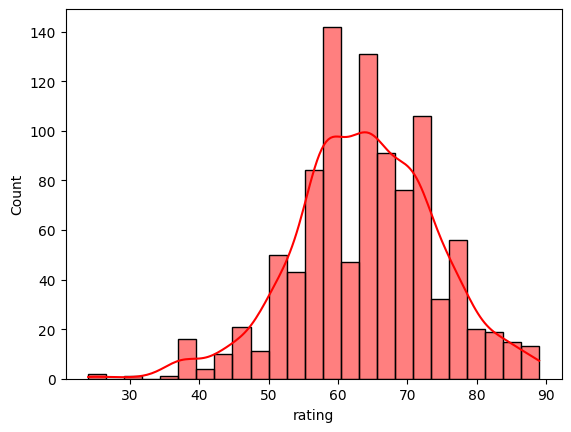

In [85]:
sns.histplot(data=df, x=df.rating, color='red', kde=True)

<Axes: xlabel='price', ylabel='num_cores'>

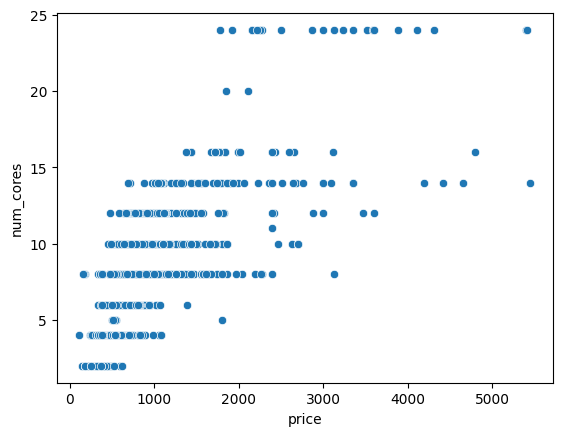

In [50]:
sns.scatterplot(data=df, x=df.price, y=df.num_cores)

In [86]:
df.year_of_warranty.unique()

array([1, 2, 3])

In [53]:
df.loc[df['year_of_warranty'] == "No information", 'year_of_warranty'] = 1
df['year_of_warranty'] = df['year_of_warranty'].astype(int)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [55]:
df.year_of_warranty.unique()

array([1, 2, 3])

In [56]:
df['is_touch_screen'] = df['is_touch_screen'].astype(int)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

/var/folders/5z/nms2vp9s0_1dm1130xnk264w0000gn/T/ipykernel_78139/3640101390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(percentual_brand, palette='viridis')


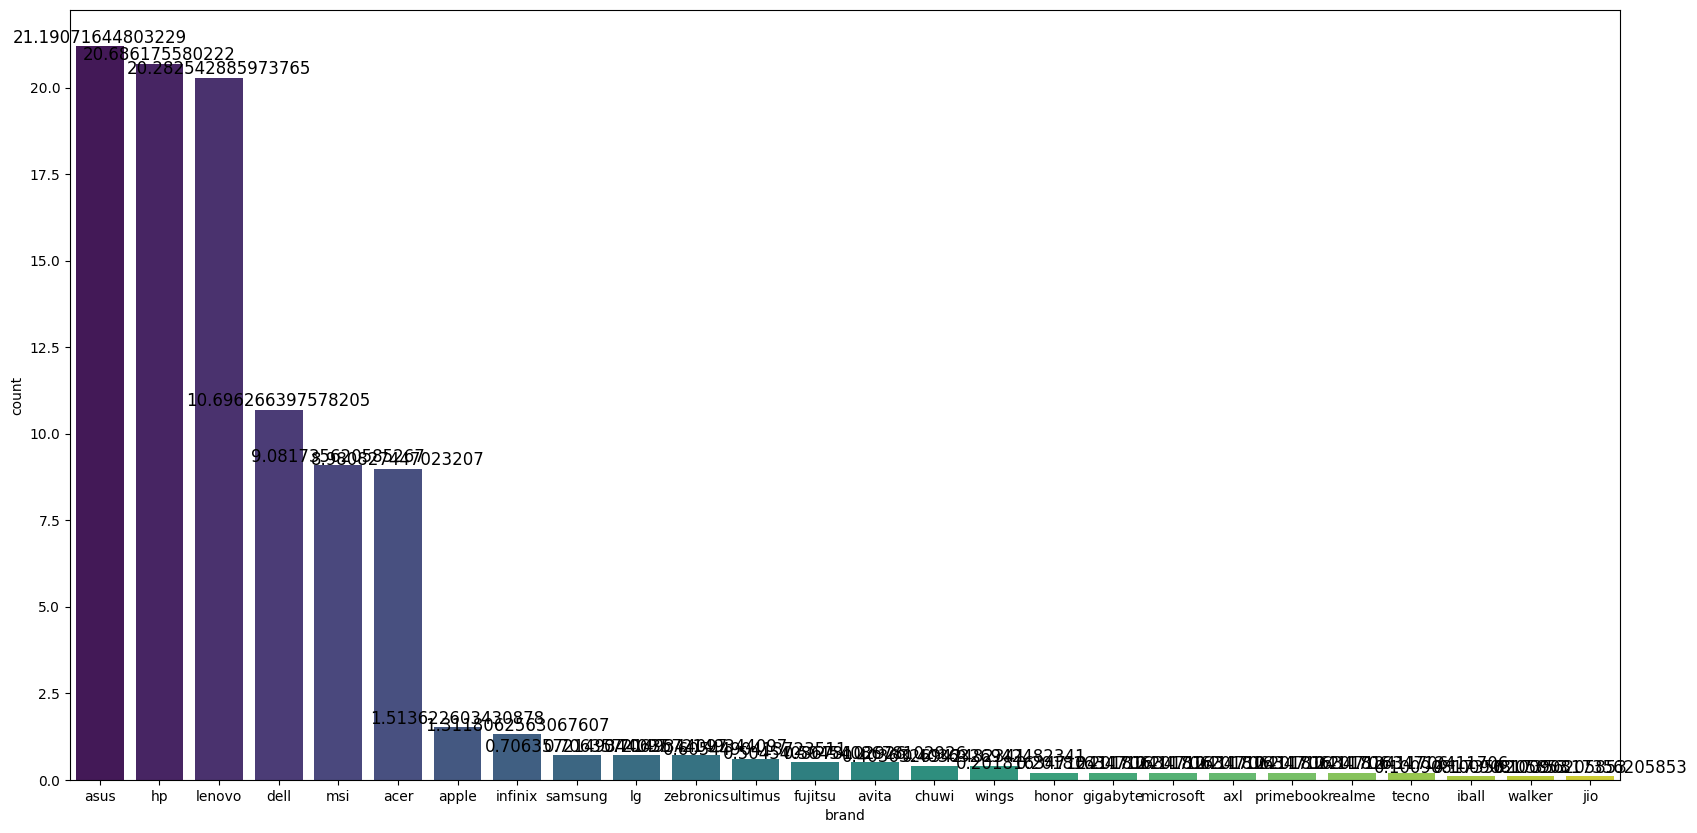

In [81]:
percentual_brand = df.value_counts('brand') / len(df) * 100
plt.figure(figsize=[20, 10])
barplot = sns.barplot(percentual_brand, palette='viridis')

for p in barplot.patches:
    barplot.annotate(f'{p.get_height()}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=12, color='black')

plt.show()

<Axes: xlabel='price', ylabel='brand'>

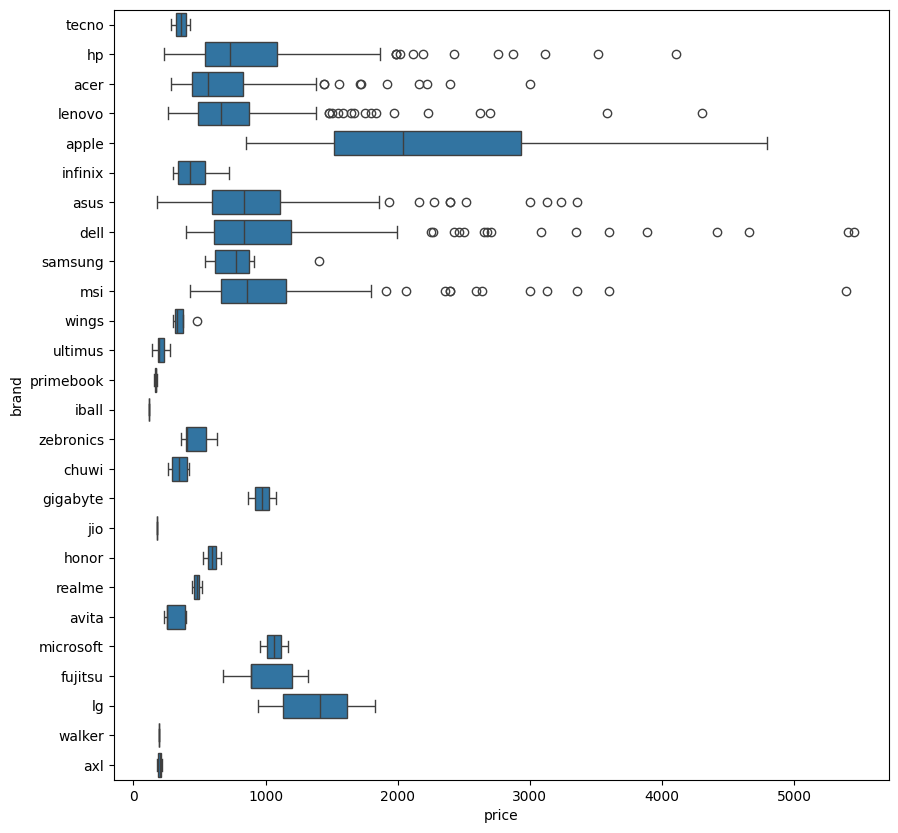

In [89]:
plt.figure(figsize=[10, 10])
sns.boxplot(x=df.price, y=df.brand)

In [92]:
df[df['brand'] == 'apple'].price.unique()

array([ 851.41, 4796.16, 1235.2 , 1439.09, 1319.15, 3476.88, 4196.49,
       2997.15, 2397.48, 1738.92, 1595.  , 1642.97, 2277.54, 2877.21,
       2037.68])

<Axes: xlabel='price', ylabel='Count'>

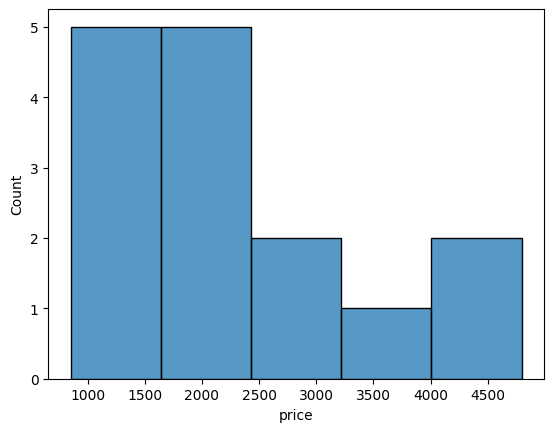

In [94]:
sns.histplot(data=df[df['brand'] == 'apple'].price)

<Axes: xlabel='price', ylabel='rating'>

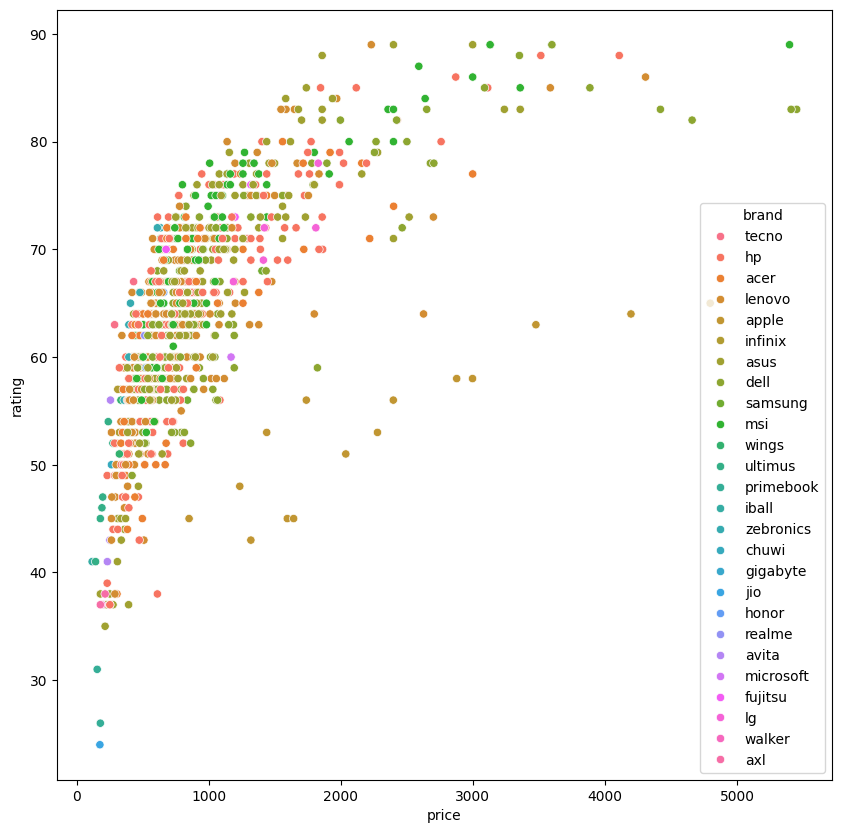

In [97]:
plt.figure(figsize=[10, 10])
sns.scatterplot(data=df, x=df.price, y=df.rating, hue=df.brand)